<a href="https://colab.research.google.com/github/PrabhatRajput001/Heart-disease_prediction/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heart Disease Prediction model**

A heart disease patient prediction model is a predictive model designed to assess and predict the likelihood of an individual developing heart disease or experiencing cardiovascular events based on various clinical and demographic features. The goal of such a model is to aid healthcare professionals in early diagnosis, risk assessment, and preventive care for heart disease patients. Here's a summary of a heart disease patient prediction mode

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')


In [2]:
# Machine learning libraries
# Import all the libraries related to sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Importing libraries for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importing evaluation metrics libraries for classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve


In [3]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# file_path
file_path = '/content/drive/MyDrive/Csvfile/heart.csv'

In [5]:
df = pd.read_csv(file_path)

In [6]:
df.shape

(918, 12)

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
# first five row of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
# Numerical description about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [11]:
# Null value of the dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
# duplicated value of the dataset
df.duplicated().sum()

0

In [13]:
# Unique values of each columns
for x in df.columns:
  unique_number = df[x].nunique()
  print(f'Total unique number of {x} is: \033[1m{unique_number}\033[0m')

Total unique number of Age is: 50
Total unique number of Sex is: 2
Total unique number of ChestPainType is: 4
Total unique number of RestingBP is: 67
Total unique number of Cholesterol is: 222
Total unique number of FastingBS is: 2
Total unique number of RestingECG is: 3
Total unique number of MaxHR is: 119
Total unique number of ExerciseAngina is: 2
Total unique number of Oldpeak is: 53
Total unique number of ST_Slope is: 3
Total unique number of HeartDisease is: 2


#### **EDA -1**

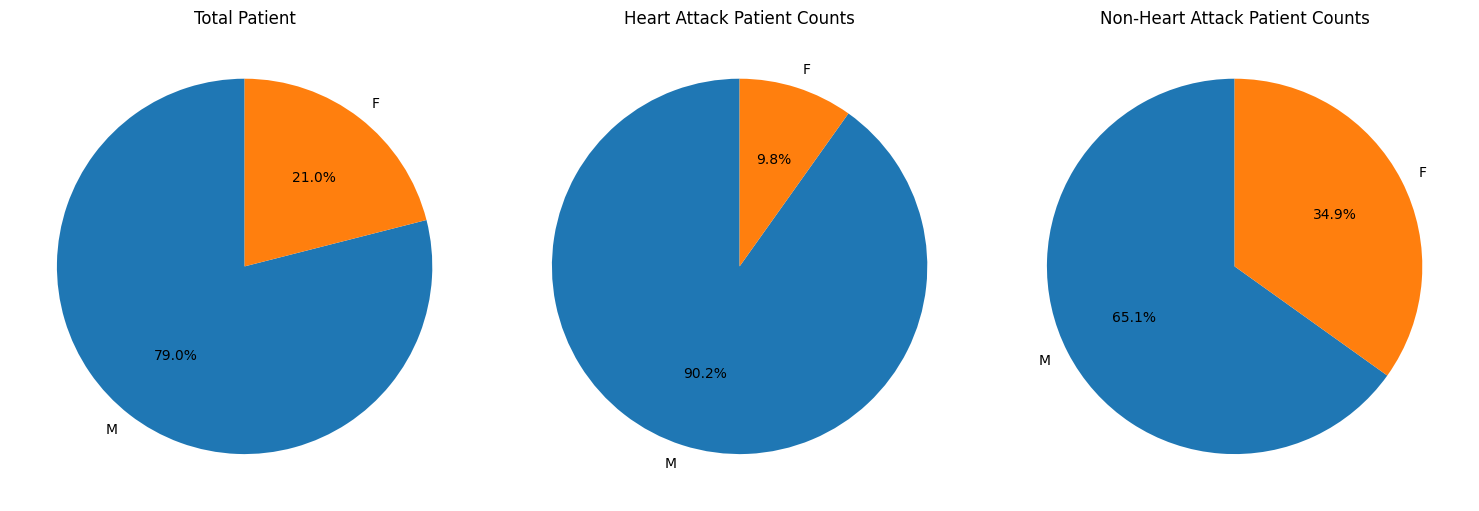

In [14]:
# Sample data
population = df['Sex'].value_counts().reset_index()
population.columns = ['Sex', 'Counts']

heart_attack_counts = df[df['HeartDisease'] == 1]['Sex'].value_counts().reset_index()
heart_attack_counts.columns = ['Sex', 'Counts']

non_heart_attack = df[df['HeartDisease'] == 0]['Sex'].value_counts().reset_index()
non_heart_attack.columns = ['Sex', 'Counts']

# Create a figure with 1 row and 3 columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create the first pie plot (population distribution) in the first subplot
axes[0].pie(population['Counts'], labels=population['Sex'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Total Patient')

# Create the second pie plot (heart attack counts) in the second subplot
axes[1].pie(heart_attack_counts['Counts'], labels=heart_attack_counts['Sex'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Heart Attack Patient Counts')

# Create the third pie plot (non-heart attack counts) in the third subplot
axes[2].pie(non_heart_attack['Counts'], labels=non_heart_attack['Sex'], autopct='%1.1f%%', startangle=90)
axes[2].set_title('Non-Heart Attack Patient Counts')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


**why we use this chart?**

In pie chart we analyze the value in percantage easily.

**What are the insight of the chart?**

By the analyze this chart we have some insight regarding the dataset:

1. There is 79% Male patient and only 21% Female patient.

2. Above 90% Heart Patient are male where as only 10% female patient has heart attack issue.

3. 65% patient in other type of illness related to men where as approximately 35% female is related to other type illness.

### **EDA : 2**

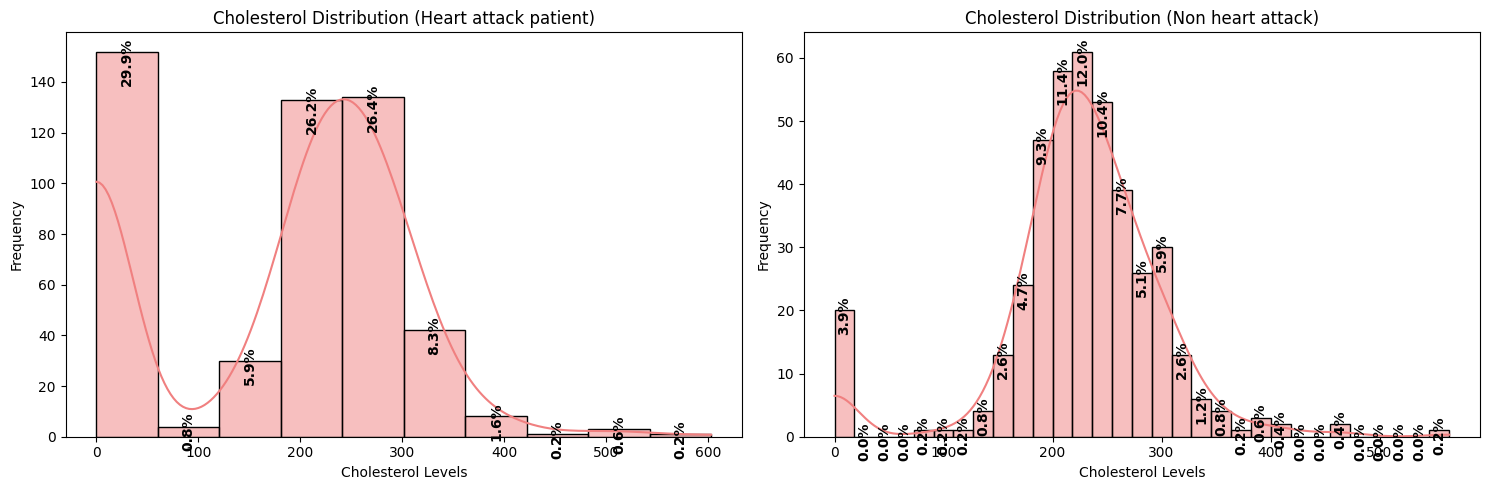

In [15]:
# Data for heart attack and non-heart attack patients
heart_attack_patient = df[df['HeartDisease'] == 1]['Cholesterol']
non_heart_attack_patient = df[df['HeartDisease'] == 0]['Cholesterol']

# Calculate the total counts for each group
total_heart_attack = len(heart_attack_patient)
total_non_heart_attack = len(non_heart_attack_patient)

# Create the plot size
plt.figure(figsize=(15,5))

# Create a dictionary
cholesterol = {
    'Heart attack patient': heart_attack_patient,
    'Non heart attack': non_heart_attack_patient
}

# Create histogram plots
for i, (title, data) in enumerate(cholesterol.items()):
    plt.subplot(1, 2, i + 1)
    sns.histplot(data, color='lightcoral', kde=True)
    plt.title(f'Cholesterol Distribution ({title})')
    plt.xlabel('Cholesterol Levels')
    plt.ylabel('Frequency')

    # Annotate the bars with their percentage values and rotate the labels by 90 degrees
    for p in plt.gca().patches:
        percentage = (p.get_height() / total_heart_attack) * 100
        plt.gca().annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='top', fontsize=10, fontweight='bold', color='black', xytext=(0, 10),
                           textcoords='offset points', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()


**Why we choose this plot?**

we choose this plot bescause it give us the cholesterol distribution agaist Heart attack.

**what are the insight of the plot?**

There is no specific information in the plot because there is not relation between cholesterol and heart attack.

#### **EDA - 3**

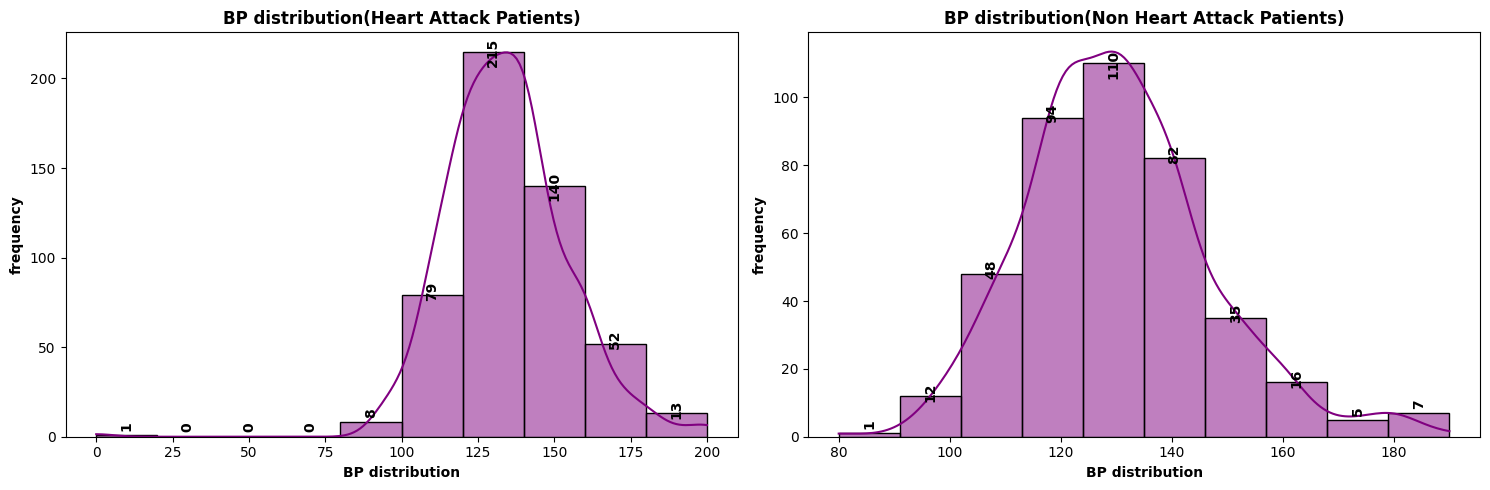

In [16]:
# data preparation
heart_attack_patient = df[df['HeartDisease'] == 1]['RestingBP']
non_heart_attack_patient = df[df['HeartDisease'] == 0]['RestingBP']

BP_patients = {
    'Heart Attack Patients' : heart_attack_patient,
    'Non Heart Attack Patients' : non_heart_attack_patient
}
# create the size of plot
plt.figure(figsize = (15,5))

for i, (title,data) in enumerate(BP_patients.items()):
  plt.subplot(1,2,i+1)
  ax = sns.histplot(data, bins = 10, color = 'purple', kde = True)
  plt.title(f'BP distribution({title})', fontweight = 'bold')
  plt.xlabel('BP distribution', fontweight = 'bold')
  plt.ylabel('frequency', fontweight = 'bold')
  # Annotate the bars with their percentage values and rotate the labels by 90 degrees
  for p in ax.patches:
    count_value = int(p.get_height())
    ax.annotate(f'{count_value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top', fontsize=10, fontweight='bold', color='black', xytext=(0, 10),
                textcoords='offset points', rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()


**Why we choose this plot?**

This type of Chart give us the information about distribution of BP in Heart attack patient and non heart attack patient.

**what are the insight of the plot?**

There is also no clear relation between heart attack and BP.

#### **EDA- 4**

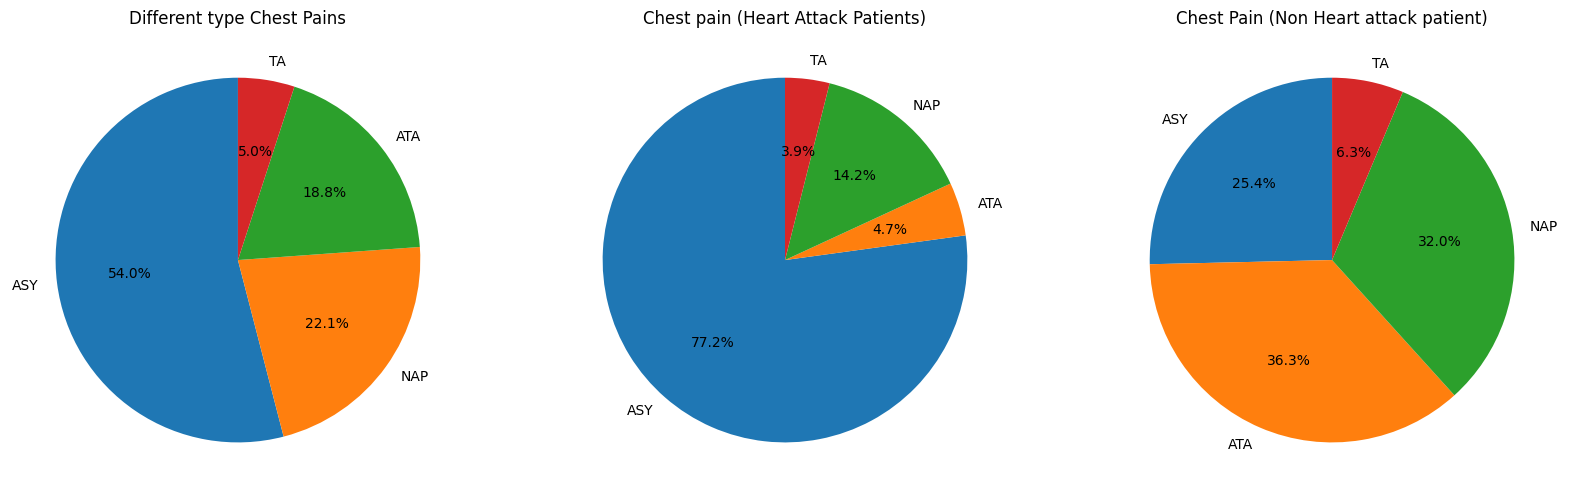

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each chest pain type in the dataset
Chest_pain = df['ChestPainType'].value_counts().reset_index()
Chest_pain.columns = ['ChestPainType', 'count']

# Count the occurrences of each chest pain type among heart attack patients
heart_attack_patient = df[df['HeartDisease'] == 1].groupby('ChestPainType').size().reset_index()
heart_attack_patient.columns = ['ChestPainType', 'count']

# Count the occurrences of each chest pain type among non-heart attack patients
non_heart_attack_patient = df[df['HeartDisease'] == 0].groupby('ChestPainType').size().reset_index()
non_heart_attack_patient.columns = ['ChestPainType', 'count']

# Create the list of dataframes
plots = [Chest_pain, heart_attack_patient, non_heart_attack_patient]

# Create the figure size for the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Titles for each pie chart
titles = ['Different type Chest Pains', 'Chest pain (Heart Attack Patients)', 'Chest Pain (Non Heart attack patient)']

# Create subplots for each pie chart
for i, data in enumerate(plots):
    ax = axes[i]
    ax.pie(data['count'], labels=data['ChestPainType'], autopct='%1.1f%%', startangle=90)
    ax.set_title(titles[i])

plt.show()


**Why we use this Chart?**

This is most common use chart which show the insight in percentage.

**What are the insight of the Chart?**

There are some insight in chart:

1. **"ASY"** is the most comman pain type and 77% Heart attack patient feels this type of pain.

2. **'TA'** and **"ATA"** are the least comman pains in the Heart attack patient.



#### **EDA -5**

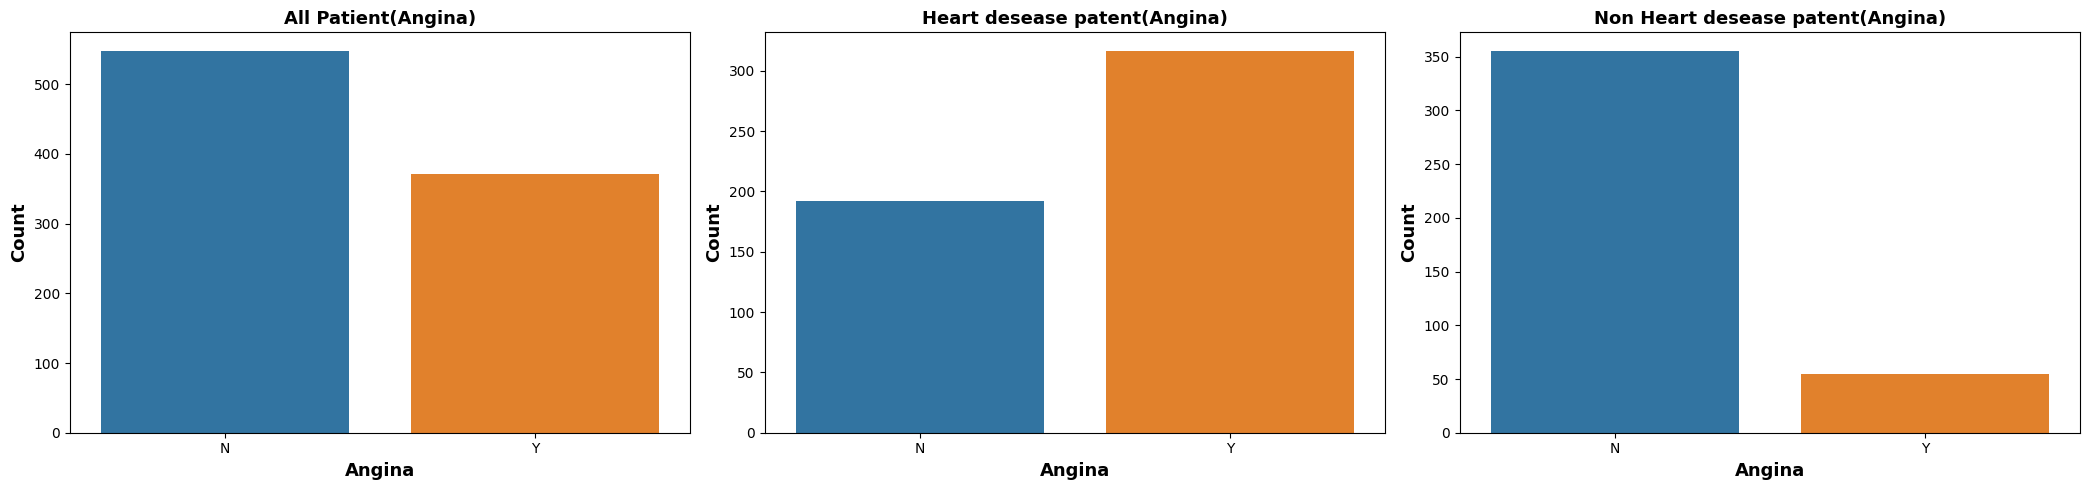

In [18]:
# unique value of Angina
Agina = df['ExerciseAngina'].value_counts().reset_index().rename(columns = {'index':'Angina','ExerciseAngina':'count'})

# Agina in Heart attack patient
heart_attack_patient = df[df['HeartDisease'] == 1].groupby('ExerciseAngina').size().reset_index()
heart_attack_patient.columns = ['Angina','count']

# Agina in non heart attack patient
non_heart_attack_patient = df[df['HeartDisease'] == 0].groupby('ExerciseAngina').size().reset_index()
non_heart_attack_patient.columns = ['Angina','count']
plots = [Agina,heart_attack_patient,non_heart_attack_patient]
titles = ['All Patient', 'Heart desease patent','Non Heart desease patent']
# Create the plot for the charts
plt.figure(figsize = (21,5))

for i , data in enumerate(plots):
  # Create the subplot for Angina
  plt.subplot(1,3,i +1)
  sns.barplot(x = 'Angina', y = 'count', data = data)
  plt.title(f'{titles[i]}(Angina)', fontsize = 13, fontweight = 'bold')
  plt.xlabel('Angina', fontsize = 13, fontweight = 'bold')
  plt.ylabel('Count', fontsize = 13, fontweight = 'bold')

  # adjust layout
  plt.tight_layout()

# show the plot
plt.show()

**Why we use this Chart?**

To know the counting the of angina in patients.

**What are the insight of the Chart?**

In this chart we analyze that the number of angina patient is less in total patient where as in the heart disease patient the number of angina patient is too high.
so we can say that it is also an another factor of heart disease.



#### **EDA -6**

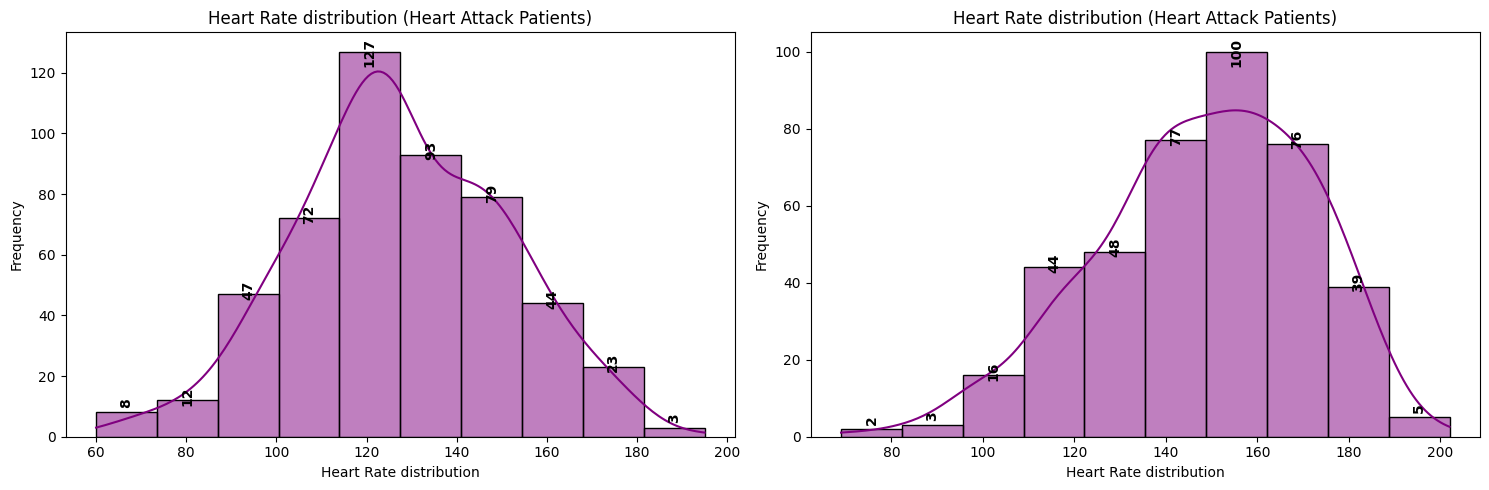

In [19]:
# data preparation
heart_attack_patient = df[df['HeartDisease'] == 1]['MaxHR']
non_heart_attack_patient = df[df['HeartDisease'] == 0]['MaxHR']
# create the size of plot
plt.figure(figsize = (15,5))

# list of subplots
plots = [heart_attack_patient, non_heart_attack_patient]
# Titles of the subplots
titles = ['Heart Attack Patients','Non Heart attack patient']

# Create the hisplot for BP distribution Heart attack patient
for i , data in enumerate(plots):
  plt.subplot(1,2,i+1)
  ax =sns.histplot(plots[i], bins = 10, color = 'purple', kde = True)
  plt.title('Heart Rate distribution (Heart Attack Patients)')
  plt.xlabel('Heart Rate distribution')
  plt.ylabel('Frequency')
  # Annotate the bars with their count values
  total_non_heart_attack = len(non_heart_attack_patient)
  for p in ax.patches:
      count_value = int(p.get_height())
      ax.annotate(f'{count_value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top', fontsize=10, fontweight='bold', color='black', xytext=(0, 10),
                textcoords='offset points', rotation=90)
  # Adjust layout
  plt.tight_layout()

# show the plot
plt.show()

**1. Why did you pick the specific chart?**
To know the Heart Rate distribution in heart disease and non-heart disease patient.

**2. What is/are the insight(s) found from the chart?**

The histogram of the distribution of Heart Rate distribution in heart disease and non heart disease patient.




#### **EDA -7**

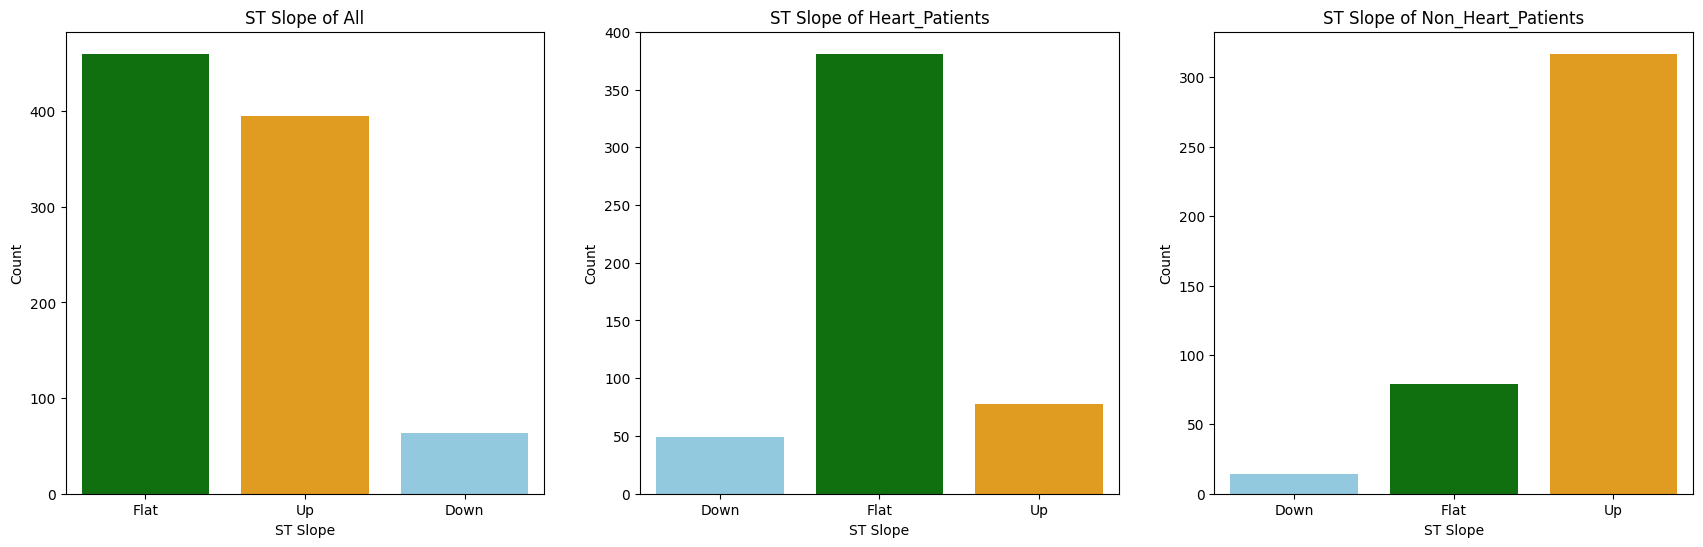

In [20]:
# Define a custom color palette for ST Slopes
custom_palette = {
    'Up': 'orange',
    'Flat': 'green',
    'Down': 'skyblue'
}

# Count the occurrences of each ST Slope for all patients
All_Patients = df['ST_Slope'].value_counts().reset_index().rename(columns={'index': 'ST_Slope', 'ST_Slope': 'Count'})

# Count the occurrences of each ST Slope among heart patients
Heart_Attack_Patients = df[df['HeartDisease'] == 1].groupby('ST_Slope').size().reset_index().rename(columns={'ST_Slope': 'ST_Slope', 0: 'Count'})

# Count the occurrences of each ST Slope among non-heart patients
Non_Heart_Attack_Patients = df[df['HeartDisease'] == 0].groupby('ST_Slope').size().reset_index().rename(columns={'ST_Slope': 'ST_Slope', 0: 'Count'})

# Define the dataframes for each patient group
patient_groups = {
    'All': All_Patients,
    'Heart_Patients': Heart_Attack_Patients,
    'Non_Heart_Patients': Non_Heart_Attack_Patients
}

# Create the figure for the plot
plt.figure(figsize=(21, 6))

# Iterate through patient groups and create subplots
for i, (title, data) in enumerate(patient_groups.items()):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='ST_Slope', y='Count', data=data, palette=custom_palette)
    plt.title(f'ST Slope of {title}')
    plt.xlabel('ST Slope')
    plt.ylabel('Count')

plt.show()


#### **EDA -8**

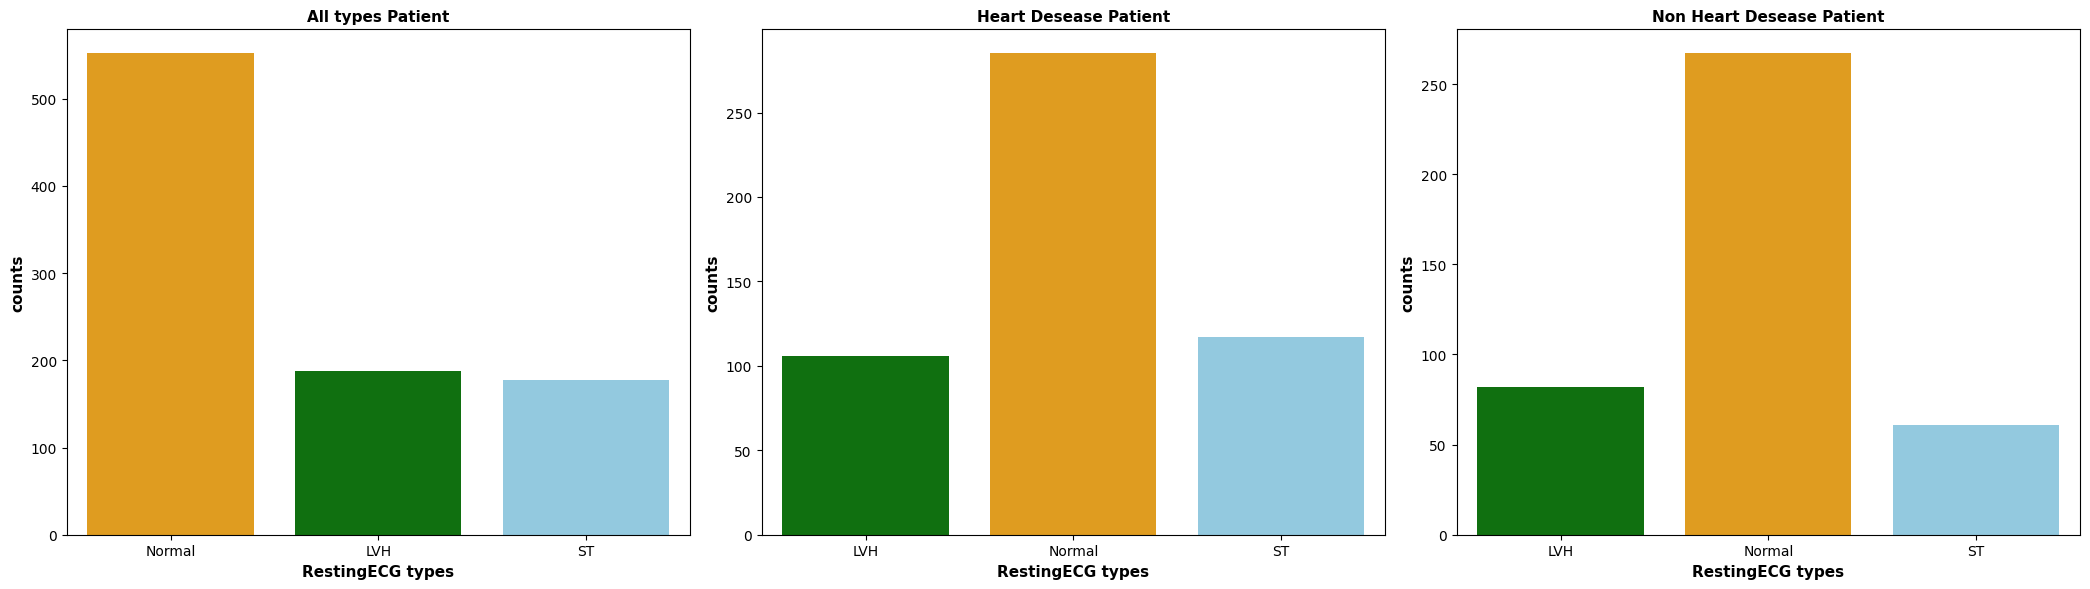

In [21]:
# Define a custom color palette for RestingECG
custom_palette = {
    'Normal': 'orange',
    'LVH': 'green',
    'ST': 'skyblue'
}
# RestingECG in all type of patient
All_patient = df['RestingECG'].value_counts().reset_index().rename(columns = {'index':'RestingECG','RestingECG':'count'})
# RestingECG in Heart Desease patient
Heart_desease_patient = df[df['HeartDisease'] == 1].groupby('RestingECG').size().reset_index()
Heart_desease_patient.columns = ['RestingECG','count']
# RestingECG in Non heart desease patient
Non_Heart_desease_patient = df[df['HeartDisease'] == 0].groupby('RestingECG').size().reset_index()
Non_Heart_desease_patient.columns = ['RestingECG','count']

plots = [All_patient, Heart_desease_patient, Non_Heart_desease_patient]
titles = ['All types Patient','Heart Desease Patient','Non Heart Desease Patient']
# create the size of plots
plt.figure(figsize=(21,6))
# Creates the plots
for i, data in enumerate(plots):
  plt.subplot(1,3,i+1)
  sns.barplot(x = 'RestingECG',y = 'count',data = data, palette=custom_palette)
  plt.title(f'{titles[i]}',fontsize = 11,fontweight = 'bold')
  plt.xlabel('RestingECG types',fontsize = 11,fontweight = 'bold')
  plt.ylabel('counts',fontsize = 11,fontweight = 'bold')
  # adjust layout
  plt.tight_layout()
# show the plots
plt.show()



#### **EDA - 9**

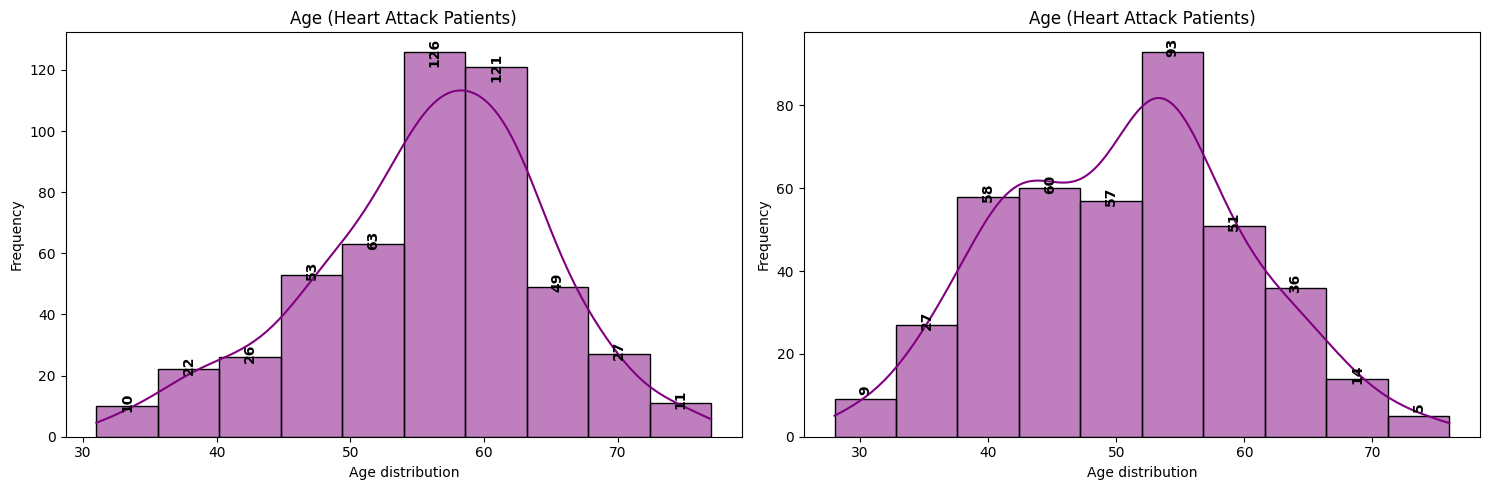

In [22]:
# data preparation
heart_attack_patient = df[df['HeartDisease'] == 1]['Age']
non_heart_attack_patient = df[df['HeartDisease'] == 0]['Age']
# create the size of plot
plt.figure(figsize = (15,5))

# list of subplots
plots = [heart_attack_patient, non_heart_attack_patient]
# Titles of the subplots
titles = ['Heart Disease Patients','Non Heart Disease patient']

# Create the hisplot for BP distribution Heart attack patient
for i , data in enumerate(plots):
  plt.subplot(1,2,i+1)
  ax =sns.histplot(plots[i], bins = 10, color = 'purple', kde = True)
  plt.title('Age (Heart Attack Patients)')
  plt.xlabel('Age distribution')
  plt.ylabel('Frequency')
  # Annotate the bars with their count values
  total_non_heart_attack = len(non_heart_attack_patient)
  for p in ax.patches:
      count_value = int(p.get_height())
      ax.annotate(f'{count_value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top', fontsize=10, fontweight='bold', color='black', xytext=(0, 10),
                textcoords='offset points', rotation=90)
  # Adjust layout
  plt.tight_layout()

# show the plot
plt.show()


#### **EDA - 10**

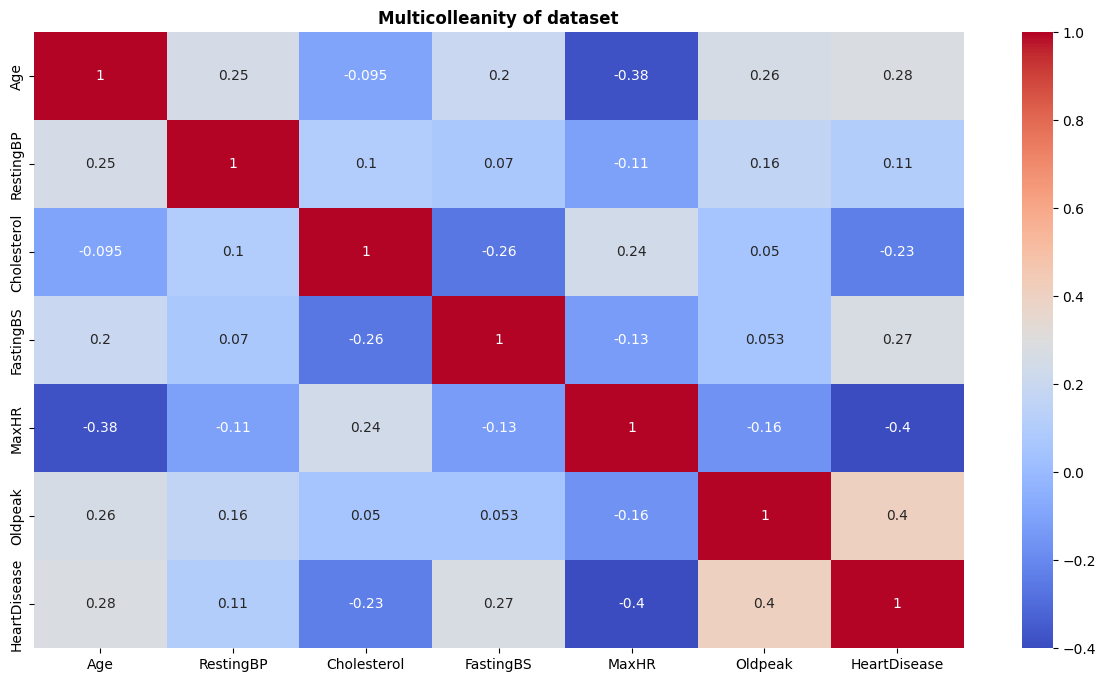

In [23]:
corr1 = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr1, cmap = 'coolwarm', annot = True)
plt.title('Multicolleanity of dataset',fontsize = 12,fontweight = 'bold')
plt.show()

1. **Why we use this chart?**

     This Chart show the multicolleanity between the variables.
2. **What are the insight of the chart?**

     By the analysis the chart we can say there is not much multicolleanity in the dataset.

#### **Preperation of the dataset.**

##### **Make a copy of the original dataset.**

In [39]:
df1 = df.copy()

##### **Make the some columns from catigorical to numerical.**

In [50]:
# To make some changes in the original dataset.
df1 =df1.replace({'Sex':{'M' :0,'F':1},
             'ExerciseAngina' : {'N' : 0, 'Y' : 1},
             'ChestPainType' :{'ASY' : 0 , 'NAP' : 1, 'ATA' : 3, 'TA' : 4},
             'RestingECG' : {'Normal' : 0, 'LVH' :1, 'ST' :2},
             'ST_Slope'  : {'Flat' : 0, 'Up' : 1, 'Down' : 2}

})

#### **To write the function for ML models**

In [ ]:
def evaluate(classifier, param_grid, cv, X_train, X_test, y_train, y_test):
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid, cv = cv)
    grid_search.fit(X_train, y_train)

    # Getting the best hyperparameters found by GridSearchCV
    best_params = grid_search.best_params_

    # Set the classifier to use the best hyperparameters
    classifier.set_params(**best_params)

    # Fit the classifier on training data
    classifier.fit(X_train, y_train)

    # Predictions on training and testing data
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)

    # Calculate evaluation metrics
    # Accuracy score
    accuracy = accuracy_score(y_train, y_pred_train)

    # Precision, Recall, and F1-score
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    # Confusion matrix
    confusion = confusion_matrix(y_test, y_pred_test)

    # Classification report
    class_report = classification_report(y_test, y_pred_test)


    # Plot confusion matrix heatmap
    class_labels = sorted(set(y_test))
    cm_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return {
        'Accuracy Score': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion


    }


In [51]:
# seperate the dataset into dependent and independent columns
X = df1.drop('HeartDisease', axis=1)
y = df1['HeartDisease']

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
# Scalling by Standard Scaler
scaling=StandardScaler()
scaling.fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

#### **1. Logistic Regression**

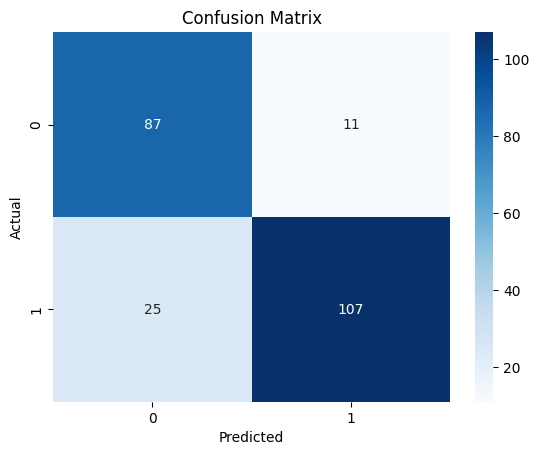

{'Accuracy Score': 0.8531976744186046,
 'Precision': 0.8513909358879882,
 'Recall': 0.8434782608695652,
 'F1 Score': 0.8443130434782609,
 'Confusion Matrix': array([[ 87,  11],
        [ 25, 107]])}

In [45]:
# we included intercept term by taking fir_intercept as true and allow maximum iteration upto 10000 it help high accuracy
Logistic_Regression = LogisticRegression(fit_intercept=True, max_iter=10000)
'''C and Penalty both are the regulizer that decide how much the data regularize
so hear i take general value by which dataset is not going to underfir or overfit and penalty both l1 i.e. Lasso and l2 i.e. Ridge'''
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}   # for tunning by grid hyperparameter

evaluate(Logistic_Regression, param_grid, 5, X_train_scaled, X_test_scaled, y_train, y_test) # implement the function evaluate



#### **2. Decision Tree**




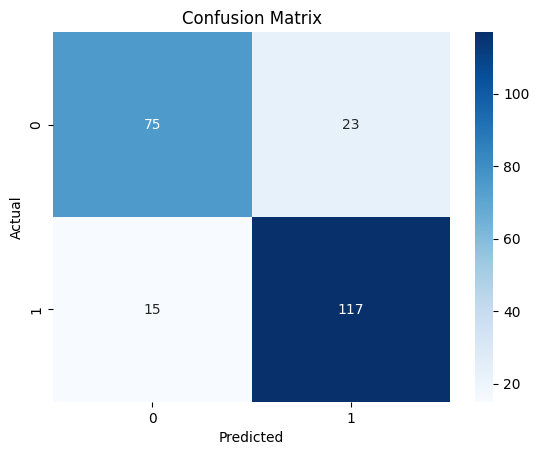

{'Accuracy Score': 0.8546511627906976,
 'Precision': 0.8346997929606625,
 'Recall': 0.8347826086956521,
 'F1 Score': 0.8336970125700603,
 'Confusion Matrix': array([[ 75,  23],
        [ 15, 117]])}

In [46]:
# Visualizing evaluation Metric Score chart
Desicion_tree_classifier = DecisionTreeClassifier(random_state=1) # implement the classification algorith with randomness value 1

'''these all are hyperparameter for tuning like maxdepth tell how much upto it grow.
leaf nodes are the end nodes from which no other brach comes out,
criteria entropy and gini both for impurity.'''

param_grid={'max_depth':[3,5,7], 'criterion':['gini', 'entropy'], 'max_leaf_nodes':[2,4,6]}
evaluate(Desicion_tree_classifier,param_grid, 5, X_train, X_test, y_train, y_test) # implement function evaluate


#### **3. Random Forest Model**


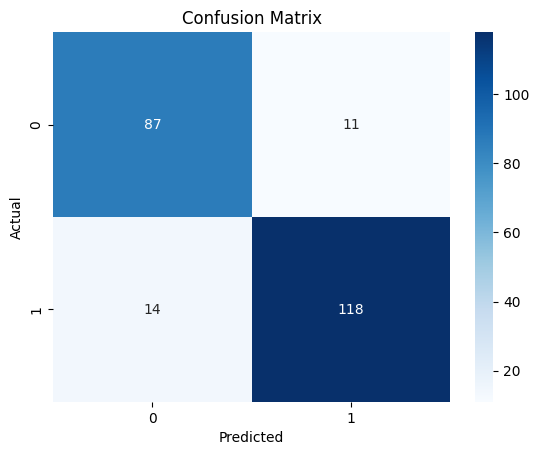

{'Accuracy Score': 0.9534883720930233,
 'Precision': 0.8920001201333481,
 'Recall': 0.8913043478260869,
 'F1 Score': 0.8914989741310249,
 'Confusion Matrix': array([[ 87,  11],
        [ 14, 118]])}

In [47]:
Random_forest_Classifier = RandomForestClassifier() # implement the algorith

'''here i just took 2 hyperparameter for tuning that is n_estimator this basically determine the number of base learners and
max_depth tell how much you can grow upto'''
param_grid = {'n_estimators':[50,80,100], 'max_depth':[3,5,7]}

evaluate(Random_forest_Classifier,param_grid, 5, X_train, X_test, y_train, y_test) # IMplement the function evaluate

#### **4. K-Nearest Classifier Model**


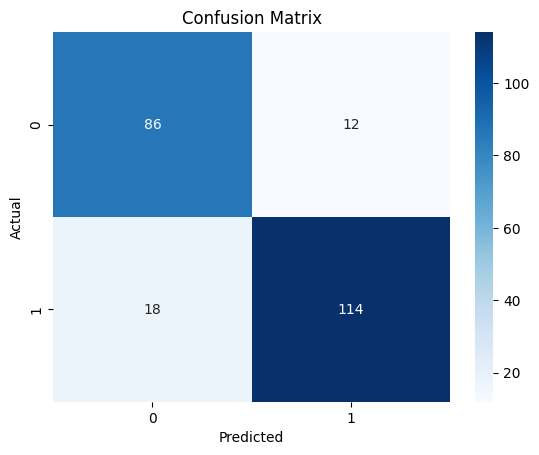

{'Accuracy Score': 0.8895348837209303,
 'Precision': 0.8715957955088389,
 'Recall': 0.8695652173913043,
 'F1 Score': 0.8699856841093613,
 'Confusion Matrix': array([[ 86,  12],
        [ 18, 114]])}

In [48]:
k_Nearest = KNeighborsClassifier() # implement algorithm.

# Number of neighbors, Weight function used in prediction, Power parameter for Minkowski distance metric
param_grid = {'n_neighbors': [3, 5, 7],  'weights': ['uniform', 'distance'],  'p': [1, 2]}

evaluate(k_Nearest, param_grid, 5, X_train_scaled, X_test_scaled, y_train, y_test) # evaluation of the model

#### **5. Support Vector Classifier Model**


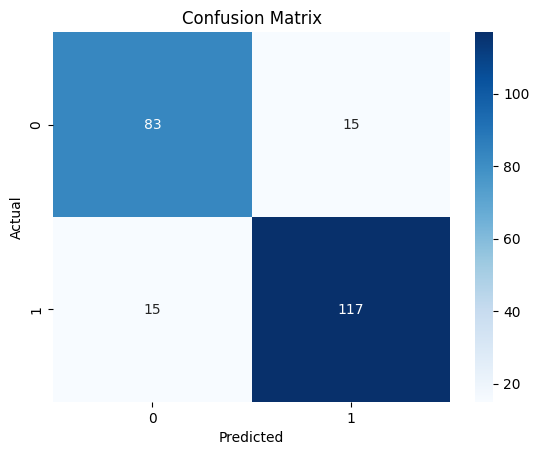

{'Accuracy Score': 0.9011627906976745,
 'Precision': 0.8695652173913043,
 'Recall': 0.8695652173913043,
 'F1 Score': 0.8695652173913043,
 'Confusion Matrix': array([[ 83,  15],
        [ 15, 117]])}

In [49]:
sSupport_vector_classifier = SVC() # Implement the algorithm

# K-Kernel is basically help to find out best hyperplane to seperate classes, C-Penalty parameter of the error term help to maintain data optimal fit
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

evaluate(Support_vector_classifier, param_grid, 5, X_train_scaled, X_test_scaled, y_train, y_test) # implement function evalute

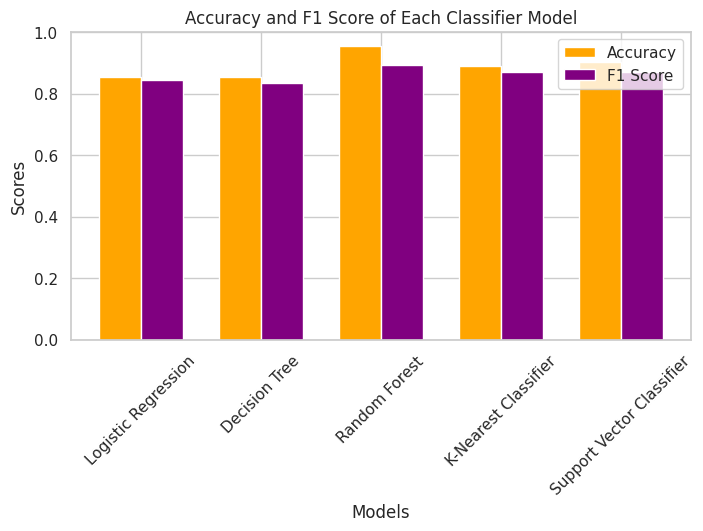

In [62]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Classifier', 'Support Vector Classifier']
accuracy_values = [0.8531, 0.8546, 0.9534, 0.8895, 0.9011]
f1_scores = [0.8443, 0.8336, 0.8914, 0.8699, 0.8695]

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for the models
x = np.arange(len(models))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# Plot accuracy values
accuracy_bars = ax.bar(x, accuracy_values, bar_width, label='Accuracy', color='orange')

# Plot F1 scores
f1_bars = ax.bar(x + bar_width, f1_scores, bar_width, label='F1 Score', color='purple')

# Set x-axis labels
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(models, rotation=45)

# Add a legend
ax.legend()

# Add labels and a title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score of Each Classifier Model')

plt.show()


By the analyze this of this chart we can see that Random forest model is highest accurate with highest F1 score.

**Final Model Implementation**

Now, we can apply the best working algorithm (i.e., Random forest Classifier) into our model and check whether our model will result in the correct output or not with the help of available data.

**CASE 1 – For Heart Disease data**


In [75]:
input=(60,1,4,151,252,1,2,143,2,1,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=Random_forest_Classifier.predict(input_reshaped)
if(pre1==1):
  print("The patient seems to be have heart disease")
else:
  print("The patient seems to be Normal")

The patient seems to be Normal


**CASE 2 – For Heart Disease data**


In [76]:
input=(60,1,4,151,252,1,2,143,1.4,1,0)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=Random_forest_Classifier.predict(input_reshaped)
if(pre1==1):
  print("The patient seems to be have heart disease")
else:
  print("The patient seems to be Normal")

The patient seems to be have heart disease


***Conclusion***

Finally, we can conclude that real-time predictors will be essential in the healthcare sector nowadays. From this project, we will be able to predict real-time heart disease using the patient’s data from the model using the Random Forest Algorithm, thereby making accurate heart disease prediction using machine learning. I hope that you are all excited about the blog. Let us know your thoughts in the comments!

Thanks for reading the article!